In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [93]:
df = pd.read_csv('../data/blogs_with_analytics.csv', sep='\t')
df.head()

index                                                url  \
0      0  blog/futustories-six-reasons-pasi-left-and-cam...   
1      1      blog/foresight-methods-and-strategic-planning   
2      2       blog/uncertainty-in-business-volatile-market   
3      3       blog/futustories-emma-leena-heikkinens-story   
4      4                    blog/safe-route-uncertain-times   

                                               title  \
0  For Senior Cloud Consultant Pasi, a change can...   
1  Foresight methods and strategic planning lead ...   
2  Future uncertainty, how to deal with uncertain...   
3  To be leader is not naturally given. Emma-Leen...   
4  Good quality data used in the right way is at ...   

                       time  category  \
0  2022-09-16T00:00:00.000Z   Culture   
1  2022-09-13T00:00:00.000Z  Strategy   
2  2022-09-12T00:00:00.000Z   Opinion   
3  2022-09-01T00:00:00.000Z   Culture   
4  2022-08-26T00:00:00.000Z   Opinion   

                                                text  pageviews  \
0   1. I need awesome people around me…  I’d say ...         91   
1  This is where foresight methods and strategic ...         33   
2  The silver lining to all this doom and gloom i...         28   
3   __What does your role involve? __  I’m a clie...        180   
4  Safe Route uses data from STRADA - a database ...        105   

   unique_pageviews    avg_time  bounce_rate     exit%  
0                73  263.278788     0.275556  0.542222  
1                27  101.937500     0.045455  0.625000  
2                24  287.708333     0.181818  0.777778  
3               160   74.707071     0.304776  0.623838  
4                91   46.169884     0.209360  0.374636

In [94]:
cat_counts = df.groupby('category').count().reset_index()
cat_summary = df.groupby('category').mean().reset_index()
cat_summary['blog_count'] = cat_counts['url']
cat_summary.head()

category       index    pageviews  unique_pageviews  \
0                Culture  330.347826   373.818841        344.347826   
1          Emerging Tech  353.794872   356.461538        326.948718   
2                 Events  516.817073    57.207317         53.280488   
3  Innovation and Design  373.883721  1024.604651        907.325581   
4               Learning  466.803279  1135.557377       1063.377049   

     avg_time  bounce_rate     exit%  blog_count  
0   85.017830     0.467468  0.534506         138  
1   77.784135     0.591653  0.625485          39  
2   43.298007     0.598354  0.430848          82  
3   86.052224     0.566862  0.581809          86  
4  130.116400     0.589986  0.601999          61

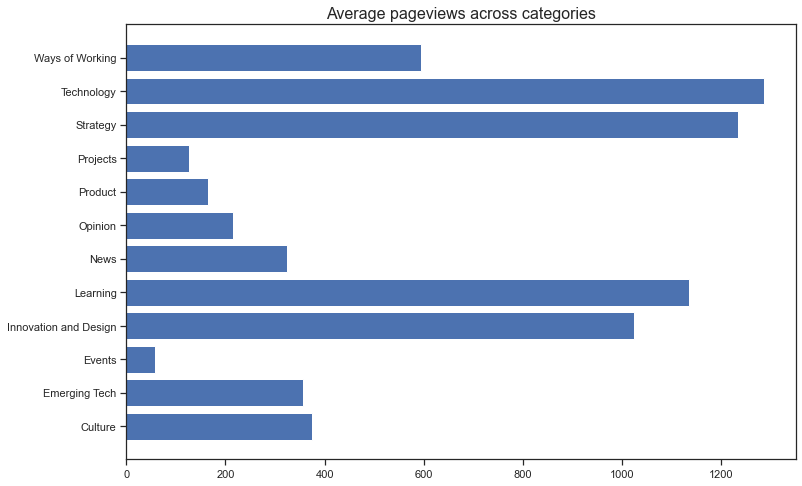

In [95]:
plt.figure(figsize=(12, 8))
plt.barh(y=cat_summary['category'], width=cat_summary['pageviews'])
plt.title('Average pageviews across categories', fontsize=16)
plt.show()

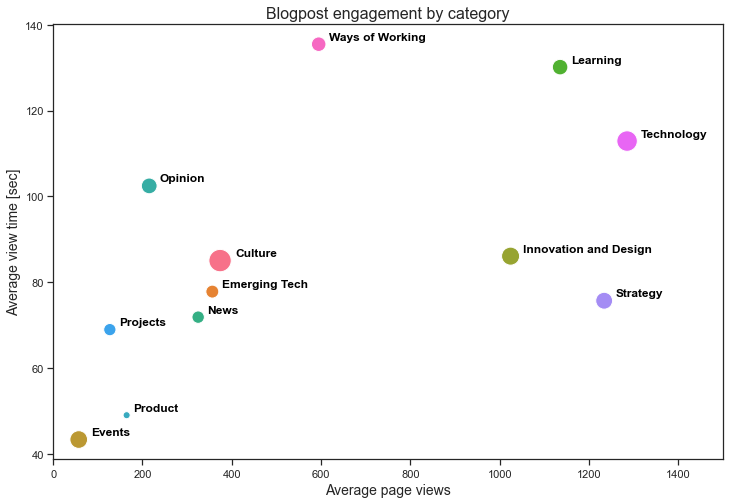

In [96]:
x = cat_summary['pageviews']
y = cat_summary['avg_time']

sns.set(rc={'figure.figsize':(12, 8)})
sns.set_style('ticks')
sns.color_palette("bright")


ax = sns.scatterplot(data=cat_summary, x='pageviews', y='avg_time', hue='category', size='blog_count', sizes=(50, 500), legend=False)
ax.axes.set_title('Blogpost engagement by category', fontsize=16)
ax.set_xlim(0,1500)
ax.set_xlabel('Average page views', fontsize=14)
ax.set_ylabel('Average view time [sec]', fontsize=14)

for line in range(0, cat_summary.shape[0]):
    ax.text(cat_summary['pageviews'][line] + cat_summary['blog_count'][line]/7 + 15, 
            cat_summary['avg_time'][line] + 1,
            cat_summary['category'][line],
            horizontalalignment='left',
            size='medium',
            color='black',
            weight='semibold'
            )

# sns.move_legend(ax, 'upper left', bbox_to_anchor=(1,1))
plt.show()

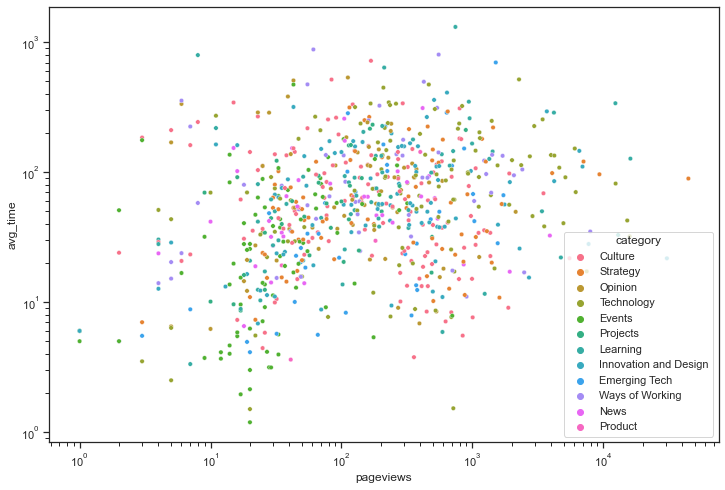

In [97]:
sns.set_style('ticks')
sns.color_palette("bright")

fig, ax = plt.subplots(figsize=(12,8))
ax.set(yscale='log', xscale='log')
sns.scatterplot(ax=ax, data=df, x='pageviews', y='avg_time', hue='category', s=20)
plt.show()

In [102]:
def truncate_title(title, max_length):
    if len(title) > max_length:
        return title[:max_length - 3].strip() + '...'
    else:
        return title


df['title_short'] = df['title'].apply(truncate_title, max_length=100)
# df['avg_time'].replace(0, 1, inplace=True)
source = df

brush = alt.selection(type='interval')

engagement = alt.Chart(source).mark_point(size=3).encode(
    x=alt.X('pageviews:Q', scale=alt.Scale(type="log")),
    # x = 'pageviews:Q',
    y=alt.Y('avg_time:Q', scale=alt.Scale(type='symlog')),
    # y=alt.Y('avg_time:Q'),
    color=alt.condition(brush, 'category:N', alt.value('lightgray')),
    tooltip=[
        alt.Tooltip('title_short:N'),
        alt.Tooltip('category:N'),
        alt.Tooltip('date:T'),
        alt.Tooltip('pageviews', format='.0f'),
        alt.Tooltip('avg_time', format='.0f')
    ]
).add_selection(
    brush
)

bars = alt.Chart(source).mark_bar().encode(
    y='category:N',
    color='category:N',
    x='count(category):Q'
).transform_filter(
    brush
)

engagement & bars

alt.VConcatChart(...)